##**Outline:**
* Provided are the daily adjusted closing prices for 3 notoriously high-return stocks (AMZN, DPZ, and NFLX) and 1 cryptoasset (BTC) from May 2013-May 2019.

In this analysis I'll be:

* Visually comparing their discrete growth history, after normalizing the scaling. 
* Adding the assets into 2 arbitrily-weighted portfolios and seeing what the discrete returns look like in them.
* Calculating the log returns of the assets for risk purposes
* Calculating the annual returns, variances, and standard deviations for each asset
* Visually comparing the assets by return and standard deviation
* Calculating both the covariance and correlation matrices to see each asset's relationship with one another
* Calculating portfolio volatility for the weighted portfolios used for the return analysis 
* Calculating the diversifiable and non-diversifiable risk for each portfolio, based on the covariance of the assets
* Visually looking at the diversifiable and non-diversifiable risks per portfolio


##Part 1
Importing data, discrete returns, normalization, trend visualization

**Importing the necessary packages: **

**Numpy** - used for array method calculations in this analysis: 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html
https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

**Pandas** - used originally for me to pull in the csv file in original analysis:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

**Matplotlib** - used for visual graph
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dowloaded and organized in excel from Yahoo Finance, indexing the date column.

In [2]:
pd.read_csv('../input/portfolio_data.csv', index_col = 'Date')

,AMZN,DPZ,BTC,NFLX
Date,,,,
5/1/2013,248.229996,51.190983,106.250000,30.415714
5/2/2013,252.550003,51.987320,98.099998,30.641428
5/3/2013,258.049988,52.446388,112.900002,30.492857
5/6/2013,255.720001,53.205257,109.599998,30.098572
5/7/2013,257.730011,54.151505,113.199997,29.464285
5/8/2013,258.679993,54.385727,112.800003,29.801428
5/9/2013,260.160004,54.020340,117.699997,30.915714
5/10/2013,263.630005,54.357620,115.639999,31.098572
5/13/2013,264.510010,54.573097,111.400002,32.768570


Assigning the data to a variable named "mydata". This makes it so I can work with the data.

In [3]:
mydata = pd.read_csv('../input/portfolio_data.csv', index_col = 'Date')

Here is a visual represention of the data before normalization. This isn't helpful because all the assets start off at different places.

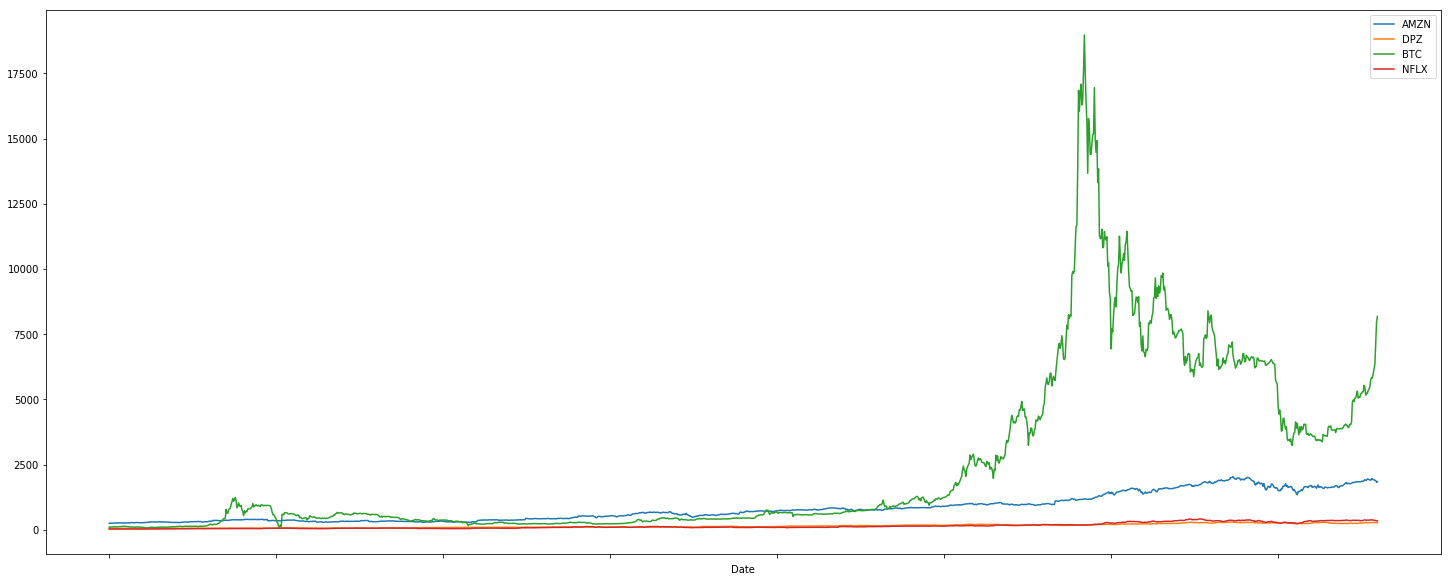

In [4]:
(mydata).plot(figsize = (25, 10));
plt.show()

Next I will use the pandas ".iloc" method for integer-location based indexing / selection by position. This selects the first row only of the data. I will use this next in the normalization process.

In [5]:
mydata.iloc[0]

AMZN    248.229996
DPZ      51.190983
BTC     106.250000
NFLX     30.415714
Name: 5/1/2013, dtype: float64

Now I will normalize the data. Basically, all I'm doing here is making it so the first row of data for all 4 columns starts at 100. This way growth can be comparable for them moving forward. You can normalize the data by dividing the entire dataset by the first row and then multiplying the entire set by 100. Below is the normalization and the graph. As you can see, bitcoin is in another dimension compared to the other 3 assets.

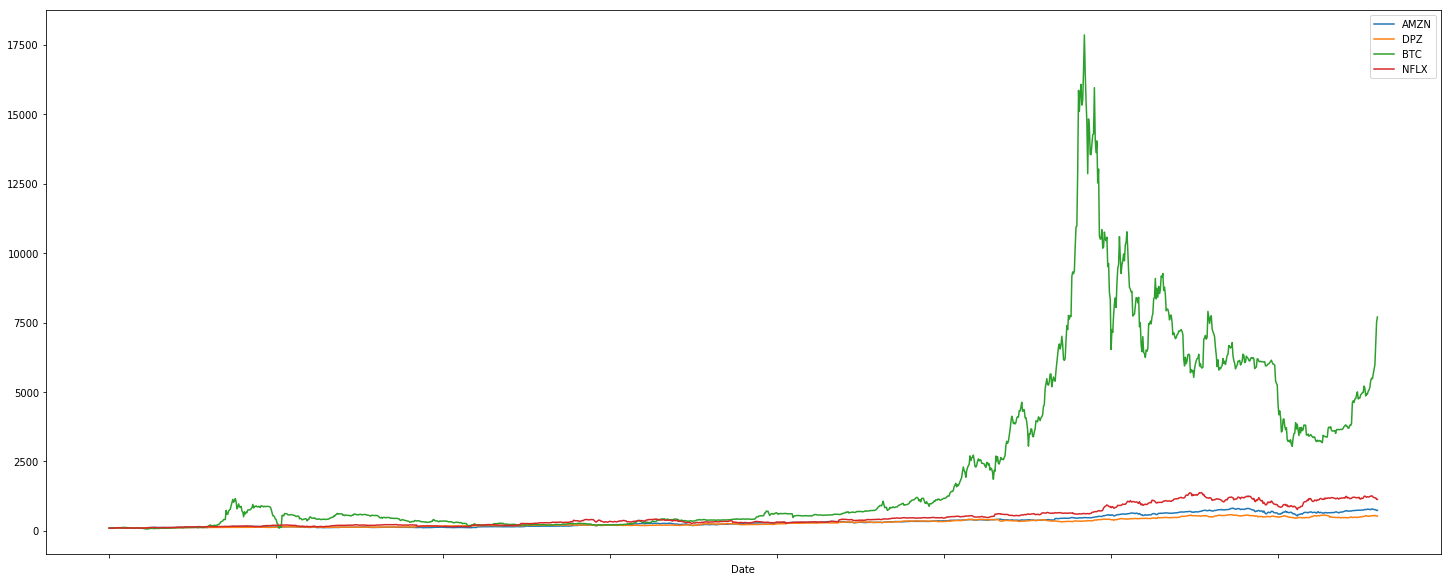

In [38]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (25, 10));
plt.show()

Let's go ahead and figure out the daily return fluctuations now. (P1/P0) - 1 = daily price change. The shift method helps with this line of code.

In [7]:
returns = (mydata / mydata.shift(1)) - 1
returns.head

<bound method NDFrame.head of                AMZN       DPZ       BTC      NFLX
Date                                             
5/1/2013        NaN       NaN       NaN       NaN
5/2/2013   0.017403  0.015556 -0.076706  0.007421
5/3/2013   0.021778  0.008830  0.150867 -0.004849
5/6/2013  -0.009029  0.014469 -0.029229 -0.012930
5/7/2013   0.007860  0.017785  0.032847 -0.021074
5/8/2013   0.003686  0.004325 -0.003534  0.011442
5/9/2013   0.005721 -0.006718  0.043440  0.037390
5/10/2013  0.013338  0.006244 -0.017502  0.005915
5/13/2013  0.003338  0.003964 -0.036665  0.053700
5/14/2013  0.014442  0.012876  0.025314  0.020011
5/15/2013 -0.006596 -0.023051  0.034933  0.040304
5/16/2013 -0.009154 -0.011797  0.044751 -0.026171
5/17/2013  0.021884  0.010709 -0.002348  0.008311
5/20/2013 -0.008410 -0.014764 -0.002597  0.002301
5/21/2013  0.004596  0.004055  0.007405 -0.010269
5/22/2013 -0.021944 -0.005970  0.020194 -0.035978
5/23/2013 -0.004411  0.045928  0.053840 -0.010413
5/24/2013 -0.000229 

I calculated the average yearly return by finding total mean and then multiplying it by the number of trading days in a year. 
Side note: Bitcoin is traded 24/7; In the data-processing phase of this project, I only deleted the non publically-traded days for bitcoin to make it compatible with the 3 stocks.

In [8]:
annual_returns = returns.mean() * 250
annual_returns

AMZN    0.374651
DPZ     0.306885
BTC     1.459425
NFLX    0.488746
dtype: float64

I made a few arrays of arbitrary portfolio weight. The first is all 25%, the second is a bit more conservative with bitcoin at 10% and the others at 30% each. 

In [9]:
weights_1 = np.array([0.25, 0.25, 0.25, 0.25])
weights_2 = np.array([0.3, 0.3, 0.1, 0.3])

Next, I set up the portfolios by multiplying the annual returns with each respective weight.

In [10]:
port_1 = np.dot(annual_returns, weights_1)
port_2 = np.dot(annual_returns, weights_2)

print (port_1)
print (port_2)

0.657426716753596
0.4970271319329638


Lastly, I'm formatting those numbers to look better by using a function.

In [11]:
def looks(x):
    print ('The yearly discrete return of this portfolio is: ' + str(round(x,5)*100) + '%')
       
looks(port_1)
looks(port_2)

The yearly discrete return of this portfolio is: 65.743%
The yearly discrete return of this portfolio is: 49.703%


##Part 2
log returns, variances, standard deviations

Now, let's look at some risk. First I will calulate the log_returns for these assets individually, and using that information, I will calculate daily standard deviation and yearly standard deviation.
The formula for log returns is simply ln(P1/P0).

In [12]:
log_returns = np.log(mydata/mydata.shift(1))
log_returns

,AMZN,DPZ,BTC,NFLX
Date,,,,
5/1/2013,NaN,NaN,NaN,NaN
5/2/2013,0.017254,0.015436,-0.079807,0.007394
5/3/2013,0.021544,0.008792,0.140515,-0.004860
5/6/2013,-0.009070,0.014366,-0.029665,-0.013015
5/7/2013,0.007829,0.017629,0.032319,-0.021299
5/8/2013,0.003679,0.004316,-0.003540,0.011377
5/9/2013,0.005705,-0.006741,0.042523,0.036708
5/10/2013,0.013250,0.006224,-0.017657,0.005897
5/13/2013,0.003332,0.003956,-0.037355,0.052308


**AMZN** log_return,variance and std.
For yearly std, you multiply by the square root of 250 trading days

In [13]:
amzn_annual_return = log_returns['AMZN'].mean()*250
amzn_annual_var = log_returns['AMZN'].var() *250
amzn_annual_std = log_returns['AMZN'].std()*250**.5
print (amzn_annual_return,amzn_annual_var, amzn_annual_std)

0.3296955799098841 0.08926480213584996 0.29877215756467324


**DPZ** log_return, var, and std

In [14]:
dpz_annual_return = log_returns['DPZ'].mean()*250
dpz_annual_var = log_returns['DPZ'].var()*250
dpz_annual_std = log_returns['DPZ'].std()*250**.5
print (dpz_annual_return,dpz_annual_var, dpz_annual_std)

0.27541069534348755 0.06263986102128784 0.25027956572858245


**BTC** log_return,var,and std

In [15]:
btc_annual_return = log_returns['BTC'].mean()*250
btc_annual_var = log_returns['BTC'].var()*250
btc_annual_std = log_returns['BTC'].std()*250**.5
print (btc_annual_return,btc_annual_var, btc_annual_std)

0.7149639132494515 1.2352502225450175 1.111418113288162


**NFLX** log_return, var, and std

In [16]:
nflx_annual_return = log_returns['NFLX'].mean()*250
nflx_annual_var = log_returns['NFLX'].var()*250
nflx_annual_std = log_returns['NFLX'].std()*250**.5
print (nflx_annual_return,nflx_annual_var, nflx_annual_std)

0.399992025269733 0.17627010470882923 0.41984533427064447


Visualized Returns to Standard Deviations: As you can see with Bitcoin, higher risk usually involves higher return!

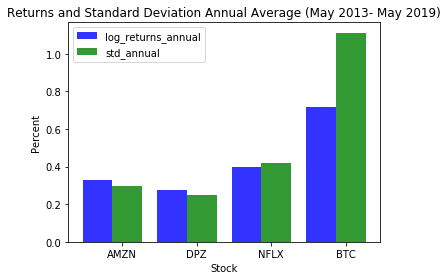

In [17]:
n_groups = 4
returns = (amzn_annual_return, dpz_annual_return, nflx_annual_return, btc_annual_return)
std = (amzn_annual_std, dpz_annual_std, nflx_annual_std, btc_annual_std)

fig,ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8

rects1 = plt.bar(index, returns, bar_width,
alpha = opacity,
color ='b',
label = 'log_returns_annual')

rects2 = plt.bar(index + bar_width, std, bar_width,
alpha = opacity,
color ='g',
label = 'std_annual')

plt.xlabel('Stock')
plt.ylabel('Percent')
plt.title('Returns and Standard Deviation Annual Average (May 2013- May 2019)')
plt.xticks(index + .33,('AMZN', 'DPZ', 'NFLX', 'BTC'))
plt.legend()

plt.tight_layout()
plt.show()

##Part 3
Covariance and Correlations Matrices

I will now determine the covariance between the assets:
https://corporatefinanceinstitute.com/resources/knowledge/finance/covariance/
In the matrix, you can see that the when an asset matches with itself, that shows the annual variance figure from earlier. The higher positive value between 2 assets, the stronger the covariance.


In [18]:
cov_matrix_annual = log_returns.cov() * 250
cov_matrix_annual

,AMZN,DPZ,BTC,NFLX
AMZN,0.089265,0.023451,-0.003589,0.056170
DPZ,0.023451,0.062640,-0.003447,0.026572
BTC,-0.003589,-0.003447,1.235250,0.004711
NFLX,0.056170,0.026572,0.004711,0.176270


The correlation is below
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [19]:
corr_matrix = log_returns.corr()
corr_matrix

,AMZN,DPZ,BTC,NFLX
AMZN,1.000000,0.313611,-0.010808,0.447788
DPZ,0.313611,1.000000,-0.012391,0.252878
BTC,-0.010808,-0.012391,1.000000,0.010095
NFLX,0.447788,0.252878,0.010095,1.000000


##Part 4
Portfolio volatility and variances

Portfolio Risk:
Below is the portfolio volatility for 
**weight_1** (all assets having 25% weights) 
**weight_2** (the portfolio volatility of the 3 stocks 30% and BTC at 10%).

The Np.dot function is essentially multiplying 3 vectors together: (ab)^2 = a^2b^2 = [aT * b * a]
* the transposed weights vector (hence the .T after weights)
* the annualized covariance matrix from above
* the non transposed weights vector

Side note: portfolio volatility is the same thing as portfolio standard deviation.
If you want to calculate portfolio variance, simply take the square root off the end.


In [22]:
pfolio_vol_annual_w1 = np.dot(weights_1.T,np.dot(log_returns.cov() * 250, weights_1)) **0.5
pfolio_vol_annual_w2 = np.dot(weights_2.T,np.dot(log_returns.cov() * 250, weights_2)) **0.5

def looks_2(x):
    print ('The annual volatility of this portfolio is: ' + str(round(x,6)*100) + '%')
    
looks_2(pfolio_vol_annual_w1)
looks_2(pfolio_vol_annual_w2)

pfolio_var_annual_w1 = np.dot(weights_1.T,np.dot(log_returns.cov() * 250, weights_1))
pfolio_var_annual_w2 = np.dot(weights_2.T,np.dot(log_returns.cov() * 250, weights_2))

def looks_3(x):
    print ('The annual variance of this portfolio is: ' + str(round(x,6)*100) + '%')
    
looks_3(pfolio_var_annual_w1)
looks_3(pfolio_var_annual_w2)


The annual volatility of this portfolio is: 33.2712%
The annual volatility of this portfolio is: 24.6705%
The annual variance of this portfolio is: 11.0698%
The annual variance of this portfolio is: 6.0863%


##Part 5
Diversifiable vs Non-Diversifiable Risk

Let's calculate the diversifiable (dr) and non-diversifiable risk (n_dr) of these portfolios now.
To do this, we are going to take the annual portfolio variance and subtract the individual annual asset variance components.

With Weights 1: (25%AMZN + 25%DPZ + 25%BTC + 25%NFLX)

In [30]:
dr_1 = pfolio_var_annual_w1 - (weights_1[0] ** 2 * amzn_annual_var) - (weights_1[1] ** 2 * dpz_annual_var) - (weights_1[2] ** 2 * btc_annual_var)-(weights_1[3] ** 2 * nflx_annual_var)

n_dr_1 = pfolio_var_annual_w1 - dr_1

dr_1
n_dr_1

print ('The diversifiable risk in portfolio 1 is ' + str(dr_1) + 
       'The non-diversifiable risk in portfolio 1 is ' + str(n_dr_1))

The diversifiable risk in portfolio 1 is 0.012983459351710585The non-diversifiable risk in portfolio 1 is 0.09771406190068654


With Weights 2: (30%AMZN + 30%DPZ + 10%BTC + 30%NFLX)

In [31]:
dr_2 = pfolio_var_annual_w2 - (weights_2[0] ** 2 * amzn_annual_var) - (weights_2[1] ** 2 * dpz_annual_var) - (weights_2[2] ** 2 * btc_annual_var)-(weights_2[3] ** 2 * nflx_annual_var)

n_dr_2 = pfolio_var_annual_w2 - dr_2

print ('The diversifiable risk in portfolio 1 is ' + str(dr_2) + 
       'The non-diversifiable risk in portfolio 1 is ' + str(n_dr_2))

The diversifiable risk in portfolio 1 is 0.018975157329468195The non-diversifiable risk in portfolio 1 is 0.041888231333387205


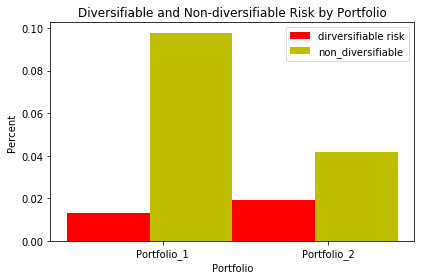

In [36]:
n_groups = 2
diversifiable = (dr_1, dr_2)
non_diversifiable = (n_dr_1, n_dr_2)

fig,ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 1.0

rects1 = plt.bar(index, diversifiable, bar_width,
alpha = opacity,
color ='r',
label = 'dirversifiable risk')

rects2 = plt.bar(index + bar_width, non_diversifiable, bar_width,
alpha = opacity,
color ='y',
label = 'non_diversifiable')

plt.xlabel('Portfolio')
plt.ylabel('Percent')
plt.title('Diversifiable and Non-diversifiable Risk by Portfolio')
plt.xticks(index + .33,('Portfolio_1', 'Portfolio_2'))
plt.legend()

plt.tight_layout()
plt.show()

Conclusions: The extra 15% of bitcoin between portfolio 1 and 2 makes a huge difference in the non_diversifiable risk. All 4 assets have high risk independantly. Amazon and Netflix have a high positive covariance. Dominos has a smaller (but still positive) relationship with the blue chips. Bitcoin is more or less entirely independant with negligible covariances links with other 3 assets, creating the huge drop in non_diversifiable risk in the change from portfolio 1 to 2. 